In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
Celenium

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [ ]:
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')      
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

# 네이버 테스트

In [ ]:
#해당 url로 이동
url = "https://www.naver.com/" 
driver.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/101.0.4951.64 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url"
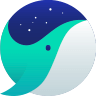
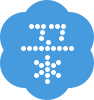

In [ ]:
html = driver.page_source
html

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
data = soup.select('#NM_NEWSSTAND_HEADER > div.direct_area > a')
data

[<a class="link_news" data-clk="newshome" href="http://news.naver.com/">뉴스홈</a>,
 <a class="link_direct" data-clk="entertainment" href="http://entertain.naver.com/home">연예</a>,
 <a class="link_direct" data-clk="sports" href="http://sports.news.naver.com/">스포츠</a>,
 <a class="link_direct" data-clk="economy" href="http://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=101">경제</a>]

In [ ]:
data[0].text

'뉴스홈'

In [ ]:
driver.close()

# 잡플래닛 정보 추출

In [ ]:
#잡플래닛 로그인

driver = webdriver.Chrome('chromedriver', options=options)

url = 'https://www.jobplanet.co.kr/users/sign_in?_nav=gb'
driver.get(url)

time.sleep(5)

#id
email = 'xxxxxxxx'  #아이디(이메일)입력
input_id = driver.find_elements_by_css_selector('input#user_email')[0]
input_id.clear()
input_id.send_keys(email)

#password
password = 'xxxxxxxx' #패스워드입력
input_pw = driver.find_elements_by_css_selector('input#user_password')[0]
input_pw.send_keys(password)
input_pw.submit()

time.sleep(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


## 잡플래닛 테스트

In [ ]:
#테스트
#url = 'https://www.jobplanet.co.kr/job'
#driver.get(url)
#time.sleep(5)

#html = driver.page_source
#soup = BeautifulSoup(html, 'html.parser')

#data = soup.select('div.job_posting_tab > ul > li.on > a')

In [ ]:
#data[0].text

'홈'

## 은행/금융업 추출

### 추출 테스트

In [ ]:
page = 63

range(1, page+1)

range(1, 64)

In [ ]:
url = 'https://www.jobplanet.co.kr/companies?industry_id=900&page=1'

driver.get(url)
time.sleep(1)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

data = soup.select('div.section_group > section.company content_ty3 > div > div > dl.content_col2_3 cominfo > dt.us_titb_l3 > a')
data

[]

In [ ]:
data = soup.select('div.section_group > section.company.content_ty3 > div > div > dl.content_col2_3.cominfo > dt.us_titb_l3 > a')
data[0].text

'국민건강보험공단'

In [ ]:
data[0]['href'].split('/')[2]

'44440'

In [ ]:
url = 'https://www.jobplanet.co.kr/companies/44440/reviews/'

driver.get(url)
time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

#AVG
data = soup.select('div.review_stats_wrapper.total > div.stats_smr_sec.left_sec > div.rate_star_wrap.type2 > span ')
float(data[0].text)

In [ ]:
# n / benefit / balance / culture / promotion / boarder

#n
data = soup.select('div.stats_hd > h2')

#float(data[0].text)
text = data[0].text
float(text.split('(')[1].split('명')[0])

#benefit
data = soup.select('div.rate_bar_set.barfill.total > div > div.rate_bar_group > div.rate_bar_unit > span.txt_point')
float(data[0].text)

#balance
float(data[1].text)

#culture
float(data[2].text)

#promotion
float(data[3].text)

#boarder
float(data[4].text)

3.3

In [ ]:
#recommend / CEO_support / Potential

#recommend
data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie1 > span')
float(data[0].text.split('%')[0])/100

#CEO_support
data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie2 > span')
float(data[0].text.split('%')[0])/100

#Potential
data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie3 > span')
float(data[0].text.split('%')[0])/100


0.34

###추출 작업

In [ ]:
#은행/금융업 리스트

name = []
id = []

page = 63

for i in range(1,page+1):
  url = 'https://www.jobplanet.co.kr/companies?industry_id=900&page='
  url = url + str(i)
  
  driver.get(url)
  time.sleep(1)

  html = driver.page_source
  soup = BeautifulSoup(html, 'html.parser')

  data = soup.select('div.section_group > section.company.content_ty3 > div > div > dl.content_col2_3.cominfo > dt.us_titb_l3 > a')

  for unit in (data):
    name.append(unit.text)
    id.append(unit['href'].split('/')[2])


In [ ]:
#평점 추출

score = []  #총 평점
n= [] #평가자 수
benefit_pay = []  #복지및급여
balance = []  #업무와 삶의 균형
culture = []  #사내문화
promotion = []  #승진 기회 및 가능성
boarder = []  #경영진
recommend = []  #기업추천비율
CEO_support = []  #CEO 지지율
potential = []  #성장가능성


for idx in id:
  url = 'https://www.jobplanet.co.kr/companies/' + idx + '/reviews/'
  driver.get(url)
  time.sleep(1)

  html = driver.page_source
  soup = BeautifulSoup(html, 'html.parser')

  data = soup.select('div.review_stats_wrapper.total > div.stats_smr_sec.left_sec > div.rate_star_wrap.type2 > span ')
  
  #score
  score.append(float(data[0].text))

  #n
  data = soup.select('div.stats_hd > h2')
  text = data[0].text
  n.append(float(text.split('(')[1].split('명')[0]))

  #benefit_pay
  data = soup.select('div.rate_bar_set.barfill.total > div > div.rate_bar_group > div.rate_bar_unit > span.txt_point')
  benefit_pay.append(float(data[0].text))

  #balance
  balance.append(float(data[1].text))

  #culture
  culture.append(float(data[2].text))

  #promotion
  promotion.append(float(data[3].text))

  #boarder
  boarder.append(float(data[4].text))

  #recommend(%)
  data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie1 > span')
  recommend.append(data[0].text.split('%')[0])

  #CEO_support(%)
  data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie2 > span')
  CEO_support.append(data[0].text.split('%')[0])

  #Potential(%)
  data = soup.select('div.stats_smr_sec.right_sec.rate_pie_group.premium_total_reviews > div > div.rate_pie.pie3 > span')
  potential.append(data[0].text.split('%')[0])

In [ ]:
data = pd.DataFrame((zip(id, name, score, n, benefit_pay, balance, culture, promotion, boarder, recommend, CEO_support, potential)), 
                    columns=('id', 'name', 'score', 'n', 'benefit_pay', 'balance', 'culture', 'promotion', 'boarder', 'recommend', 'CEO_support', 'potential'))
data.to_csv("data.csv",encoding='cp949')